# Connect to MongoDB

In [3]:
import json

#  load secrets.json file 
with open('E:\git\secrets.json') as f:
    data = json.load(f)

    secret_pass = data['mongodb']

#  print the length of the secret pass.
print(f"My secret key is {len(secret_pass)} characters in length.")

My secret key is 81 characters in length.


In [4]:
import pymongo
import certifi

#  retrieved connection string from a secrets file
mongo_connection_string = data['mongodb']

# Connecting to the database 
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320_IMDB"
da320_database = client['DA320_IMDB']

# display the database with all collections
allCollections = da320_database.list_collection_names()

# list of collections in my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.6.
This database has the collections ['IMDB', 'IMDB_View1_genres:Romance', 'IMDB_view_cast: sam', 'IMDB_view2_genres:comedy', 'IMDB_view_Cast_Nicolas Cage', 'IMDB_view_year', 'IMDB_view_director1', 'IMDB_view_eq_Romance', 'IMDB_view_Horror genres', 'IMDB_view_All_Romance', 'IMDB_view_director2', 'IMDB_view0', 'IMDB_view_director3']


# Fetch a collection (imdb_view0) from mangodb without any filter

In [5]:
import pandas as pd

# Retrieve all records from  collection IMDB_view0
cursor = da320_database["IMDB_view0"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Display collection IMDB
display(imdb)

,_id,movie_title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,...,cast,castTrimmed,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,mpaa_rating,rating
0,646bd8ffb04a0be6812c3175,Grease,110.0,7.2,265183.0,6000000.0,60759.0,394955690.0,1978-06-13,"[Comedy, Musical, Romance]",...,"[John Travolta, Olivia Newton-John, Stockard...","[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],[Randal Kleiser],"[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Allan Carr, Neil A. Machlis, Robert Stigwood]","[Paramount Pictures, Robert Stigwood Organiza...","[Paramount Pictures, Robert Stigwood Organizat...",TV-14,TV-14
1,646bd8ffb04a0be6812c3176,Superman,143.0,7.4,172769.0,55000000.0,7465343.0,166200000.0,1978-12-10,"[Action, Adventure, Sci-Fi]",...,"[Marlon Brando, Gene Hackman, Christopher Re...","[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander...","[Charles Greenlaw, Richard Lester, Alexander S...","[Dovemead Films, Film Export A.G., Internati...","[Dovemead Films, Film Export A.G., Internation...",TV-PG,TV-PG
2,646bd8ffb04a0be6812c3177,The Deer Hunter,183.0,8.1,334827.0,15000000.0,NaN,NaN,1978-12-08,"[Drama, War]",...,"[Robert De Niro, John Cazale, John Savage, ...","[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deel...","[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]","[EMI Films, Universal Pictures]",R,R
3,646bd8ffb04a0be6812c3178,Halloween,91.0,7.7,267109.0,300000.0,NaN,70000000.0,1978-10-25,"[Horror, Thriller]",...,"[Donald Pleasence, Jamie Lee Curtis, Nancy K...","[Donald Pleasence, Jamie Lee Curtis, Nancy Kye...",[John Carpenter],[John Carpenter],"[Moustapha Akkad, John Carpenter, Debra Hill...","[Moustapha Akkad, John Carpenter, Debra Hill, ...","[Compass International Pictures, Falcon Inter...","[Compass International Pictures, Falcon Intern...",TV-14,TV-14
4,646bd8ffb04a0be6812c3179,National Lampoon's Animal House,109.0,7.4,119917.0,3000000.0,201747.0,3371006.0,1978-07-27,[Comedy],...,"[Tom Hulce, Stephen Furst, Mark Metcalf, Ma...","[Tom Hulce, Stephen Furst, Mark Metcalf, Mary ...",[John Landis],[John Landis],"[Ivan Reitman, Matty Simmons]","[Ivan Reitman, Matty Simmons]","[Universal Pictures, Oregon Film Factory, St...","[Universal Pictures, Oregon Film Factory, Stag...",TV-14,TV-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29438,646bd909b04a0be6812ca473,Schweinsteiger Memories: Von Anfang bis Legende,112.0,7.5,1085.0,NaN,NaN,NaN,2020-06-05,"[Documentary, Biography, Sport]",...,"[Bastian Schweinsteiger, Ana Ivanovic, Fred ...","[Bastian Schweinsteiger, Ana Ivanovic, Fred Sc...",[Robert Bohrer],[Robert Bohrer],"[Sebastian Schweiger, Til Schweiger, Christi...","[Sebastian Schweiger, Til Schweiger, Christian...",[Barefoot Films],[Barefoot Films],Not Rated,Not Rated
29439,646bd909b04a0be6812ca474,The Gulf of Silence,85.0,5.1,1483.0,NaN,NaN,NaN,2020-12-04,[Sci-Fi],...,"[Mandy May Cheetham, Donald E. Keyhoe, Richa...","[Mandy May Cheetham, Donald E. Keyhoe, Richard...",[M.K. Rhodes],[M.K. Rhodes],"[, , , , ]","[, , , , ]","[, , , , ]","[, , , , ]",Not Rated,Not Rated
29440,646bd909b04a0be6812ca475,Asalu Em Jarigindhante,110.0,7.5,5297.0,NaN,NaN,NaN,2020-08-02,[Drama],...,"[Karunya Chowdary, KarronyaKatrynn, Mahendra...","[Karunya Chowdary, KarronyaKatrynn, Mahendran,...",[Srinivas Bandari],[Srinivas Bandari],[Shaani Soloman],[Shaani Soloman],"[ABR Productions, GSFilms]","[ABR Productions, GSFilms]",Not Rated,Not Rated
29441,646bd909b04a0be6812ca476,Oka Chinna Viramam,95.0,6.3,2797.0,15000000.0,NaN,NaN,2020-02-14,[Thriller],...,"[Punarnavi Bhupalam, Garima, Naveen Neni, S...","[Punarnavi Bhupalam, Garima, Naveen Neni, Sanj...",[Sundeep Cheguri],[Sundeep Cheguri],"[Sundeep Cheguri, Abhilash Reddy]","[Sundeep Cheguri, A

# Creating subplots for Romance and Horror genres over time 

In [6]:


import pandas as pd

# Retrieve all records from  collection IMDB IMDB_view_eq_Romance
cursor = da320_database["IMDB_view_eq_Romance"].find()

# Convert this information into a Pandas dataframe
imdb1= pd.DataFrame(cursor)

# Display collection IMDB1
display(imdb1)

,_id,movie_title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,...,cast,castTrimmed,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,mpaa_rating,rating
0,646bd8ffb04a0be6812c3284,Dilâ Hanim,86.0,7.3,1522.0,NaN,NaN,NaN,1978-01-01,[Romance],...,"[Türkan Soray, Kadir Inanir, Erol Tas, Kadi...","[Türkan Soray, Kadir Inanir, Erol Tas, Kadir S...",[Orhan Aksoy],[Orhan Aksoy],"[Hasan Gürkan, Irfan Ünal]","[Hasan Gürkan, Irfan Ünal]",[Akün Film],[Akün Film],Not Rated,Not Rated
1,646bd900b04a0be6812c3a13,Namukku Parkkan Munthiri Thoppukal,137.0,8.4,2408.0,NaN,NaN,NaN,1986-09-12,[Romance],...,"[Mohanlal, Shari, Thilakan, Vineeth, Kaviy...","[Mohanlal, Shari, Thilakan, Vineeth, Kaviyoor ...",[P. Padmarajan],[P. Padmarajan],[Mani Malliath],[Mani Malliath],"[, , , , ]","[, , , , ]",Not Rated,Not Rated
2,646bd902b04a0be6812c5497,The Guy in the Grave Next Door,94.0,5.6,3092.0,NaN,NaN,NaN,2002-08-02,[Romance],...,"[Elisabet Carlsson, Michael Nyqvist, Annika ...","[Elisabet Carlsson, Michael Nyqvist, Annika Ol...",[Kjell Sundvall],[Kjell Sundvall],"[Aage Aaberge, Lars Blomgren, Charlotta Denw...","[Aage Aaberge, Lars Blomgren, Charlotta Denwar...","[Filmlance International AB, Filmpool Nord, ...","[Filmlance International AB, Filmpool Nord, So...",Not Rated,Not Rated
3,646bd903b04a0be6812c593a,Kaadhal,122.0,7.6,1107.0,NaN,NaN,NaN,2004-12-17,[Romance],...,"[Bharath Srinivasan, Sandhya, Sukumar, Kadh...","[Bharath Srinivasan, Sandhya, Sukumar, Kadhal ...",[Balaji Sakthivel],[Balaji Sakthivel],"[S. Shankar, Sundarraj]","[S. Shankar, Sundarraj]",[S Pictures],[S Pictures],Not Rated,Not Rated
4,646bd903b04a0be6812c59ab,Three Steps Over Heaven,101.0,5.0,3413.0,2500000.0,NaN,NaN,2004-03-12,[Romance],...,"[Riccardo Scamarcio, Katy Louise Saunders, M...","[Riccardo Scamarcio, Katy Louise Saunders, Mar...",[Luca Lucini],[Luca Lucini],"[Marco Chimenz, Francesca Longardi, Luigi Pa...","[Marco Chimenz, Francesca Longardi, Luigi Patr...","[Cattleya, Warner Bros.]","[Cattleya, Warner Bros.]",Not Rated,Not Rated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,646bd909b04a0be6812ca3a7,Christmas with a Crown,89.0,5.9,1085.0,NaN,NaN,NaN,2020-12-01,[Romance],...,"[Lisa Durupt, Marcus Rosner, Teryl Rothery, ...","[Lisa Durupt, Marcus Rosner, Teryl Rothery, Mi...",[Dylan Pearce],[Dylan Pearce],"[Lisa Durupt, Michael Lazarovitch, Michelle ...","[Lisa Durupt, Michael Lazarovitch, Michelle Mo...",[Northern Gateway Films],[Northern Gateway Films],Not Rated,Not Rated
63,646bd909b04a0be6812ca3d0,World Famous Lover,154.0,5.0,3184.0,NaN,NaN,NaN,2020-02-13,[Romance],...,"[Vijay Deverakonda, Raashi Khanna, Aishwarya...","[Vijay Deverakonda, Raashi Khanna, Aishwarya R...",[Kranthi Madhav],[Kranthi Madhav],"[Ayan, Alexander Vallab]","[Ayan, Alexander Vallab]","[Creative Commercials, Goldmines Telefilms]","[Creative Commercials, Goldmines Telefilms]",TV-MA,TV-MA
64,646bd909b04a0be6812ca3e6,Sufna,144.0,8.0,1938.0,NaN,NaN,NaN,2020-02-14,[Romance],...,"[Ammy Virk, Tania, Jagjeet Sandhu, Balwinde...","[Ammy Virk, Tania, Jagjeet Sandhu, Balwinder B...",[Jagdeep Sidhu],[Jagdeep Sidhu],"[Karan Gill, Sukhwinder Singh]","[Karan Gill, Sukhwinder Singh]",[Panj Paani Films],[Panj Paani Films],Not Rated,Not Rated
65,646bd909b04a0be6812ca41a,Bamfaad,102.0,7.4,2204.0,NaN,NaN,NaN,2020-04-10,[Romance],...,"[Aditya Rawal, Shalini Pandey, Vijay Varma, ...","[Aditya Rawal, Shalini Pandey, Vijay Varma, Ja...",[Ranjan Chandel],[Ranjan Chandel],"[Pankaj Batra, Sadanand Kadam, Pradeep Kumar...","[Pankaj Batra, Sadanand Kadam, Pradeep Kumar, ...","[Jar Pictures, Jar Pictures]","[Jar Pictures, Jar Pictures]",Not Rated,Not Rated


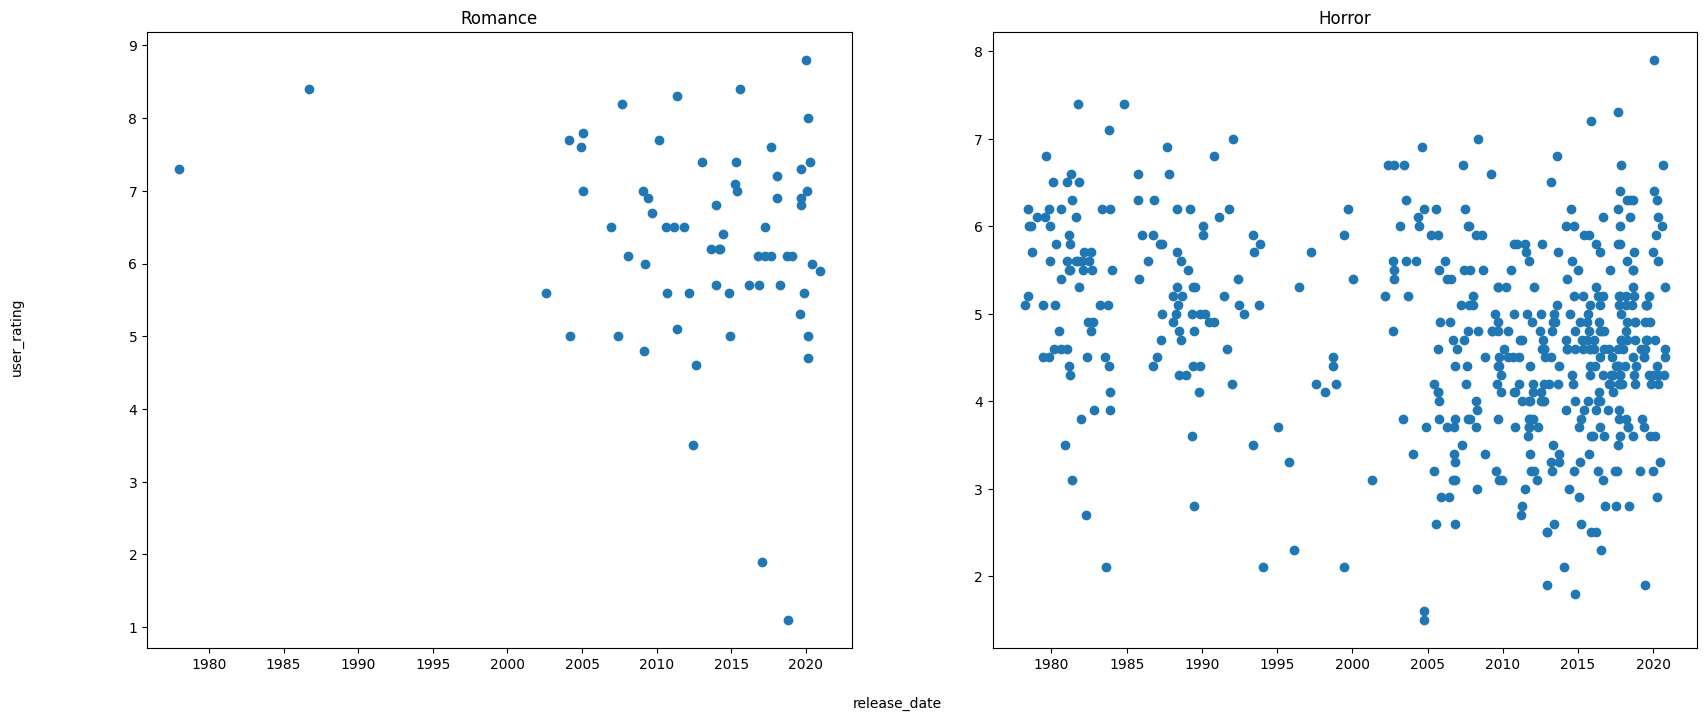

In [46]:
from matplotlib import pyplot

fig1= pyplot.figure(1, figsize=(20, 8))

chart1=fig1.add_subplot(121)
chart2=fig1.add_subplot(122)

chart1.scatter(imdb1['release_date'], imdb1[ 'user_rating'] )
chart2.scatter(imdb2['release_date'], imdb2[ 'user_rating'] )

fig1.text(0.5, 0.04, 'release_date', ha='center', va='center')
fig1.text(0.06, 0.5, 'user_rating', ha='center', va='center', rotation='vertical')
chart1.set_title('Romance')
chart2.set_title('Horror')

pyplot.show()

# Tracking the career of a director (Walter Hill)

## Fetch a collection (IMDB_view_director2)

In [47]:
import pandas as pd

# Retrieve all records from collection IMDB_view_director2
cursor = da320_database["IMDB_view_director2"].find()

# Convert this information into a Pandas dataframe
imdb3= pd.DataFrame(cursor)

# Display collection IMDB3
display(imdb3)

,_id,movie_title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,...,cast,castTrimmed,director,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,mpaa_rating,rating
0,646bd8ffb04a0be6812c3194,The Driver,91.0,7.1,16260.0,4000000.0,NaN,654860.0,1978-06-08,"[Action, Crime, Thriller]",...,"[Ryan O'Neal, Bruce Dern, Isabelle Adjani, ...","[Ryan O'Neal, Bruce Dern, Isabelle Adjani, Ron...",[Walter Hill],[Walter Hill],"[Lawrence Gordon, Frank Marshall]","[Lawrence Gordon, Frank Marshall]","[EMI Films, Twentieth Century Fox]","[EMI Films, Twentieth Century Fox]",R,R
1,646bd8ffb04a0be6812c328f,The Warriors,93.0,7.5,101692.0,4000000.0,3529675.0,NaN,1979-02-01,"[Action, Crime, Thriller]",...,"[Michael Beck, James Remar, Dorsey Wright, ...","[Michael Beck, James Remar, Dorsey Wright, Bri...",[Walter Hill],[Walter Hill],"[Laurent Bouzereau, Freeman A. Davies, Lawre...","[Laurent Bouzereau, Freeman A. Davies, Lawrenc...",[Paramount Pictures],[Paramount Pictures],TV-14,TV-14
2,646bd8ffb04a0be6812c335b,The Long Riders,100.0,6.9,11439.0,10000000.0,NaN,NaN,1980-05-15,"[Biography, Crime, Western]",...,"[David Carradine, Keith Carradine, Robert Ca...","[David Carradine, Keith Carradine, Robert Carr...",[Walter Hill],[Walter Hill],"[James Keach, Stacy Keach, Tim Zinnemann]","[James Keach, Stacy Keach, Tim Zinnemann]","[United Artists, Huka Productions]","[United Artists, Huka Productions]",R,R
3,646bd8ffb04a0be6812c3438,Southern Comfort,106.0,7.1,19570.0,NaN,116943.0,NaN,1981-09-21,"[Action, Thriller]",...,"[Keith Carradine, Powers Boothe, Fred Ward, ...","[Keith Carradine, Powers Boothe, Fred Ward, Fr...",[Walter Hill],[Walter Hill],"[David Giler, William J. Immerman]","[David Giler, William J. Immerman]","[Cinema Group Ventures, Phoenix Films]","[Cinema Group Ventures, Phoenix Films]",R,R
4,646bd8ffb04a0be6812c351e,48 Hrs.,96.0,6.9,77218.0,12000000.0,4369868.0,NaN,1982-12-08,"[Action, Comedy, Crime, Drama, Thriller]",...,"[Nick Nolte, Eddie Murphy, Annette O'Toole, ...","[Nick Nolte, Eddie Murphy, Annette O'Toole, Fr...",[Walter Hill],[Walter Hill],"[D. Constantine Conte, Lawrence Gordon, Joel...","[D. Constantine Conte, Lawrence Gordon, Joel S...","[Paramount Pictures, Lawrence Gordon Producti...","[Paramount Pictures, Lawrence Gordon Productions]",R,R
5,646bd900b04a0be6812c3741,Streets of Fire,93.0,6.7,21353.0,14500000.0,NaN,NaN,1984-06-01,"[Action, Crime, Drama, Music, Romance, Th...",...,"[Michael Paré, Diane Lane, Rick Moranis, Am...","[Michael Paré, Diane Lane, Rick Moranis, Amy M...",[Walter Hill],[Walter Hill],"[Lawrence Gordon, Gene Levy, Joel Silver, M...","[Lawrence Gordon, Gene Levy, Joel Silver, Mae ...","[Universal Pictures, RKO Pictures, A Hill-Go...","[Universal Pictures, RKO Pictures, A Hill-Gord...",PG,PG
6,646bd900b04a0be6812c3869,Brewster's Millions,102.0,6.5,39158.0,20000000.0,NaN,45833132.0,1985-05-22,[Comedy],...,"[Richard Pryor, John Candy, Lonette McKee, ...","[Richard Pryor, John Candy, Lonette McKee, Ste...",[Walter Hill],[Walter Hill],"[Lawrence Gordon, Gene Levy, Joel Silver, M...","[Lawrence Gordon, Gene Levy, Joel Silver, Mae ...","[Universal Pictures, Davis Entertainment, La...","[Universal Pictures, Davis Entertainment, Lawr...",PG,PG
7,646bd900b04a0be6812c3985,Crossroads,99.0,7.1,16000.0,NaN,2071680.0,NaN,1986-03-14,"[Drama, Music, Mystery, Romance]",...,"[Ralph Macchio, Joe Seneca, Jami Gertz, Joe...","[Ralph Macchio, Joe Seneca, Jami Gertz, Joe Mo...",[Walter Hill],[Walter Hill],"[Mark Carliner, Mae Woods, Tim Zinnemann]","[Mark Carliner, Mae Woods, Tim Zinnemann]",[Columbia Pictures],[Columbia Pictures],TV-14,TV-14
8,646bd900b04a0be6812c3a87,Extreme Prejudice,105.0,6.6,7336.0,22000000.0,3498957.0,NaN,1987-04-24,"[Action, Crime, Drama, History, Thriller, ...",...,"[Nick Nolte, Powers Boothe, Michael Ironside...","[Nick Nolte, Powers Boothe, Michael Ironside, ...",[Walter Hill],[Walter Hill],"[Buzz Feitshans, Mario Kassar, Andrew G. Vaj...","[Buzz Feitshans, Mario K

# Creating different subplots for comparing open_weeken, budget, runtime, and user_rating for walter Hill director 

[Text(0.5, 0, 'release_date'), Text(0, 0.5, 'user_rating')]

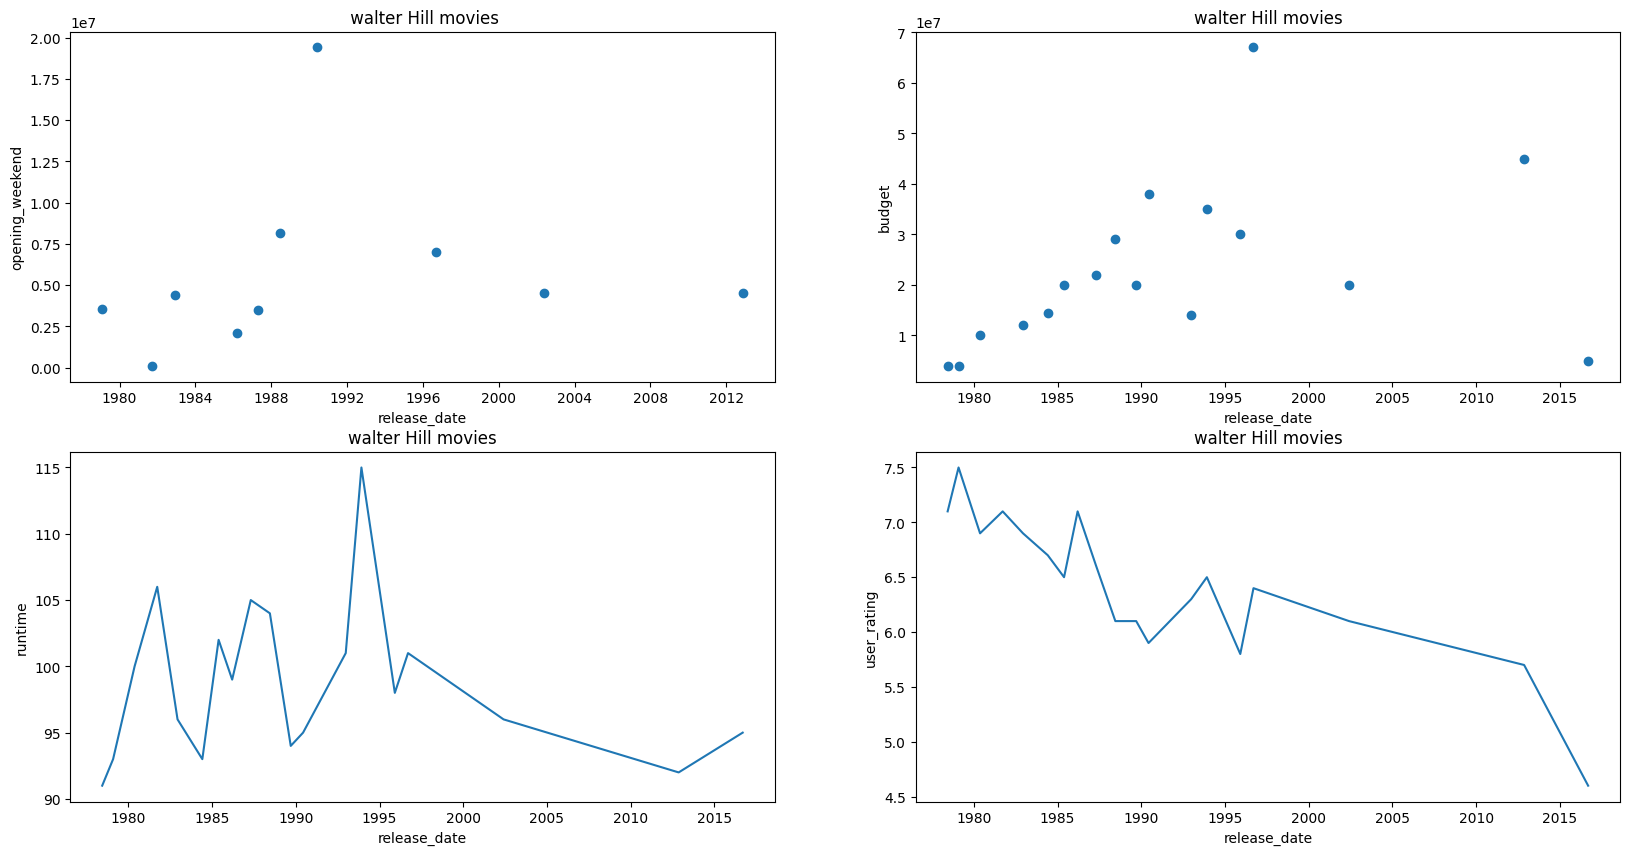

In [85]:
from matplotlib import pyplot

fig2,axes= pyplot.subplots(2,2, figsize=(20, 10))
axes[0,0].scatter(imdb3['release_date'], imdb3[ 'opening_weekend'] )
axes[0,0].set_title(' walter Hill movies')
axes[0,0].set(xlabel='release_date', ylabel='opening_weekend')

axes[0,1].scatter(imdb3['release_date'], imdb3[ 'budget'] )
axes[0,1].set_title('walter Hill movies')
axes[0,1].set(xlabel='release_date', ylabel='budget')

axes[1,0].plot(imdb3['release_date'], imdb3[ 'runtime'] )
axes[1,0].set_title('walter Hill movies')
axes[1,0].set(xlabel='release_date', ylabel='runtime')

axes[1,1].plot(imdb3['release_date'], imdb3[ 'user_rating'])
axes[1,1].set_title('walter Hill movies')
axes[1,1].set(xlabel='release_date', ylabel='user_rating')



# Graphs a chart for movies released within a single year

## Fetch a collection (IMDB_view_year)

In [86]:
import pandas as pd

# Retrieve all records from  collection IMDB_view_year
cursor = da320_database["IMDB_view_year"].find()

# Convert this information into a Pandas dataframe
imdb5= pd.DataFrame(cursor)

# Display collection IMDB5
display(imdb5)

# counting the number of rows in the collection IMDB_view_year
rows = len(imdb5.axes[0])
print(" The number of rows is ", rows)

,_id,movie_title,runtime,user_rating,votes,budget,opening_weekend,gross_sales,release_date,genres,...,directorTrimmed,producer,producerTrimmed,company,companyTrimmed,mpaa_rating,rating,release_year,release_month,release_day
0,646bd902b04a0be6812c4de2,Mission: Impossible II,123.0,6.1,336775.0,125000000.0,57845297.0,565400000.0,2000-05-18,"[Action, Adventure, Thriller]",...,[John Woo],"[Terence Chang, Tom Cruise, Michael Doven, ...","[Terence Chang, Tom Cruise, Michael Doven, Pau...","[Paramount Pictures, Cruise/Wagner Production...","[Paramount Pictures, Cruise/Wagner Productions...",TV-14,TV-14,2000,5,18
1,646bd902b04a0be6812c4de3,Requiem for a Dream,102.0,8.3,824508.0,4500000.0,64770.0,7390108.0,2000-05-14,[Drama],...,[Darren Aronofsky],"[Ben Barenholtz, Beau Flynn, Scott Franklin,...","[Ben Barenholtz, Beau Flynn, Scott Franklin, A...","[Artisan Entertainment, Thousand Words, Sibl...","[Artisan Entertainment, Thousand Words, Siblin...",Unrated,Unrated,2000,5,14
2,646bd902b04a0be6812c4de4,What Women Want,127.0,6.4,206243.0,70000000.0,33614543.0,191300000.0,2000-12-13,"[Comedy, Fantasy, Romance]",...,[Nancy Meyers],"[Bruce A. Block, Susan Cartsonis, Bruce Dave...","[Bruce A. Block, Susan Cartsonis, Bruce Davey,...","[Paramount Pictures, Icon Entertainment Inter...","[Paramount Pictures, Icon Entertainment Intern...",PG-13,PG-13,2000,12,13
3,646bd902b04a0be6812c4de5,Billy Elliot,110.0,7.7,134064.0,5000000.0,NaN,109280263.0,2000-05-19,"[Drama, Music]",...,[Stephen Daldry],"[Charles Brand, Greg Brenman, Jon Finn, Tor...","[Charles Brand, Greg Brenman, Jon Finn, Tori P...","[StudioCanal, Working Title Films, BBC Films...","[StudioCanal, Working Title Films, BBC Films, ...",TV-14,TV-14,2000,5,19
4,646bd902b04a0be6812c4de6,How the Grinch Stole Christmas,104.0,6.2,241111.0,123000000.0,55082330.0,345141403.0,2000-11-08,"[Comedy, Family, Fantasy]",...,[Ron Howard],"[Linda Fields, Brian Grazer, Todd Hallowell,...","[Linda Fields, Brian Grazer, Todd Hallowell, R...","[Universal Pictures, Imagine Entertainment, ...","[Universal Pictures, Imagine Entertainment, LU...",TV-PG,TV-PG,2000,11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,646bd902b04a0be6812c502e,A Chinese in a Coma,108.0,5.6,1182.0,NaN,NaN,NaN,2000-03-02,[Comedy],...,[Carlo Verdone],[Vittorio Cecchi Gori],[Vittorio Cecchi Gori],[Cecchi Gori Group Fin.Ma.Vi.],[Cecchi Gori Group Fin.Ma.Vi.],Not Rated,Not Rated,2000,3,2
550,646bd902b04a0be6812c5035,The Wedding,114.0,7.0,1207.0,NaN,NaN,NaN,2000-05-14,"[Comedy, Drama]",...,[Pavel Lungin],"[Michael André, Catherine Dussart, Joachim O...","[Michael André, Catherine Dussart, Joachim Ort...","[Arte France Cinéma, Canal+, Catherine Dussa...","[Arte France Cinéma, Canal+, Catherine Dussart...",Not Rated,Not Rated,2000,5,14
551,646bd902b04a0be6812c5036,Needing You...,101.0,6.7,1412.0,NaN,NaN,NaN,2000-06-23,"[Comedy, Romance]",...,"[Johnnie To, Ka-Fai Wai]","[Catherine Chan, Tiffany Chen, Johnnie To, ...","[Catherine Chan, Tiffany Chen, Johnnie To, Ka-...","[China Star Entertainment, Milky Way Image Co...","[China Star Entertainment, Milky Way Image Com...",Not Rated,Not Rated,2000,6,23
552,646bd902b04a0be6812c5037,Everything for a Reason,89.0,7.7,1543.0,NaN,NaN,NaN,2000-10-23,"[Comedy, Romance]",...,[Vlas Parlapanides],"[Gavin Bray, Charles Chevalier, John Crawfor...","[Gavin Bray, Charles Chevalier, John Crawford,...",[Asia Minor Pictures],[Asia Minor Pictures],Not Rated,Not Rated,2000,10,23


 The number of rows is  554


## Creating a data frame for counting the number of movies released in each month for year 2000

In [87]:
# step 1: wiht using collection (IMDB_view_year), I created another dataframe to show just release date
df= imdb5[['release_date']]
display(df)

#  step 2: I created another table to show how many movies released in each month of 2000 year

df1=(df.groupby([df['release_date'].dt.to_period('m')]).size().groupby(level=0).sum().reset_index(name='occurences in month'))
display(df1)


,release_date
0,2000-05-18
1,2000-05-14
2,2000-12-13
3,2000-05-19
4,2000-11-08
...,...
549,2000-03-02
550,2000-05-14
551,2000-06-23
552,2000-10-23


,release_date,occurences in month
0,2000-01,67
1,2000-02,41
2,2000-03,39
3,2000-04,38
4,2000-05,77
5,2000-06,40
6,2000-07,28
7,2000-08,38
8,2000-09,88
9,2000-10,43


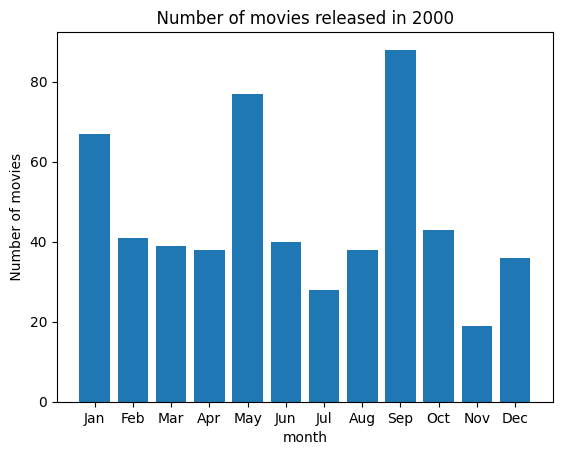

In [89]:
from matplotlib import pyplot

pyplot.title('  Number of movies released in 2000  ')
pyplot.xlabel('month')
pyplot.ylabel(' Number of movies ')
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov','Dec']
pyplot.bar(months, df1[ 'occurences in month'] )
pyplot.show()